In [13]:
import pandas as pd
import numpy as np

In [14]:
data = pd.read_csv('data/zeel/ZEEL (20240930093400000 _ 20240925105700000).csv')
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Jaw ‌Alligator‌',
       'Teeth ‌Alligator', 'Lips ‌Alligator', 'MA5', 'MA15', 'Volume',
       'Volume Change Percentage'],
      dtype='object')

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(data[['Open', 'High', 'Low', 'Close', 'Jaw ‌Alligator‌',
       'Teeth ‌Alligator', 'Lips ‌Alligator', 'MA5', 'MA15', 'Volume',
       'Volume Change Percentage']])


In [17]:
scaled_features

array([[9.69932105e-04, 9.56937799e-04, 2.95275591e-03, ...,
        8.32466181e-03, 4.16963334e-03, 1.17070622e-03],
       [0.00000000e+00, 4.78468900e-03, 7.87401575e-03, ...,
        9.36524454e-03, 9.43041934e-03, 4.69991548e-04],
       [2.90979631e-03, 3.82775120e-03, 5.90551181e-03, ...,
        8.32466181e-03, 8.81410586e-03, 1.38189723e-03],
       ...,
       [6.60523763e-01, 6.65071770e-01, 6.71259843e-01, ...,
        7.44016649e-01, 6.13525148e-02, 2.45534979e-03],
       [6.69253152e-01, 6.65071770e-01, 6.70275591e-01, ...,
        7.37773153e-01, 6.26633385e-02, 1.62930403e-03],
       [6.69253152e-01, 6.60287081e-01, 6.70275591e-01, ...,
        7.32570239e-01, 7.26154122e-02, 2.49319326e-03]])

In [18]:
def create_sequences(data, input_steps=5, output_steps=3):
    X, y = [], []
    for i in range(len(data) - input_steps - output_steps + 1):
        X.append(data[i:i+input_steps])
        y.append(data[i+input_steps:i+input_steps+output_steps])
    return np.array(X), np.array(y)

In [19]:
X, y = create_sequences(scaled_features)
X, y

(array([[[9.69932105e-04, 9.56937799e-04, 2.95275591e-03, ...,
          8.32466181e-03, 4.16963334e-03, 1.17070622e-03],
         [0.00000000e+00, 4.78468900e-03, 7.87401575e-03, ...,
          9.36524454e-03, 9.43041934e-03, 4.69991548e-04],
         [2.90979631e-03, 3.82775120e-03, 5.90551181e-03, ...,
          8.32466181e-03, 8.81410586e-03, 1.38189723e-03],
         [0.00000000e+00, 0.00000000e+00, 5.90551181e-03, ...,
          6.24349636e-03, 2.19722443e-03, 7.81284652e-05],
         [9.69932105e-04, 4.78468900e-03, 5.90551181e-03, ...,
          3.12174818e-03, 5.26850278e-03, 9.17602547e-04]],
 
        [[0.00000000e+00, 4.78468900e-03, 7.87401575e-03, ...,
          9.36524454e-03, 9.43041934e-03, 4.69991548e-04],
         [2.90979631e-03, 3.82775120e-03, 5.90551181e-03, ...,
          8.32466181e-03, 8.81410586e-03, 1.38189723e-03],
         [0.00000000e+00, 0.00000000e+00, 5.90551181e-03, ...,
          6.24349636e-03, 2.19722443e-03, 7.81284652e-05],
         [9.69932105e

In [20]:
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [21]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [22]:
# Define model parameters
input_shape = (X_train.shape[1], X_train.shape[2])
output_steps = y_train.shape[1] * y_train.shape[2]  # Predicting multiple steps

# Build the model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=input_shape, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(100, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(output_steps))

model.compile(optimizer='adam', loss='mse')

# Reshape y_train for multi-step prediction
y_train_reshaped = y_train.reshape((y_train.shape[0], output_steps))

/Users/anodic_passion/PycharmProjects/108decillion/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [23]:
# Train the model
history = model.fit(X_train, y_train_reshaped, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.3402 - val_loss: 0.0488
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0456 - val_loss: 0.0098
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0229 - val_loss: 0.0033
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0183 - val_loss: 0.0038
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0156 - val_loss: 0.0021
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0149 - val_loss: 0.0023
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0132 - val_loss: 0.0028
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0129 - val_loss: 0.0014
Epoch 9/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0122 - val_loss: 0.0014
Epoch 10/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0102 - val_loss: 0.0013
Epoch 11/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0100 - val_loss: 0.0012
Epoch 12/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0

In [24]:
from sklearn.metrics import mean_squared_error

# Predict on test data
y_pred = model.predict(X_test)
y_pred = y_pred.reshape((y_pred.shape[0], y_test.shape[1], y_test.shape[2]))
y_test_rescaled = y_test  # If you scaled the data, remember to inverse transform if necessary

mse = mean_squared_error(y_test_rescaled.flatten(), y_pred.flatten())
print(f'Test MSE: {mse}')

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Test MSE: 0.000419688101139105


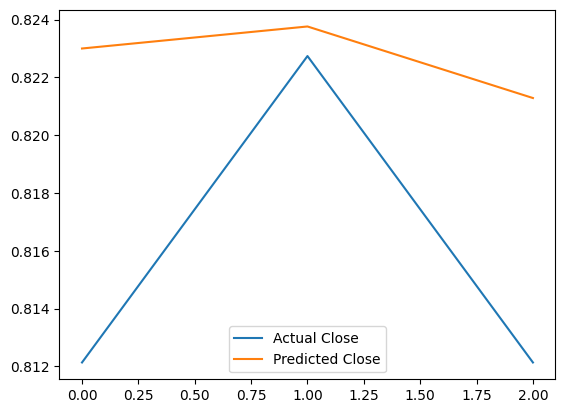

In [25]:
import matplotlib.pyplot as plt

# Example for the first feature (e.g., Close price)
plt.plot(y_test[0,:,3], label='Actual Close')
plt.plot(y_pred[0,:,3], label='Predicted Close')
plt.legend()
plt.show()

In [26]:
X_test[0], y_test[0]

(array([[8.06013579e-01, 7.99043062e-01, 8.23818898e-01, 8.07321773e-01,
         8.95693780e-01, 8.86274510e-01, 8.56115108e-01, 8.24752475e-01,
         8.63683663e-01, 4.47521782e-03, 6.37426546e-02],
        [8.10863240e-01, 8.16267943e-01, 8.32677165e-01, 8.24662813e-01,
         8.95693780e-01, 8.85294118e-01, 8.55087359e-01, 8.27722772e-01,
         8.63683663e-01, 4.47779008e-03, 5.05271433e-03],
        [8.28322017e-01, 8.16267943e-01, 8.33661417e-01, 8.08285164e-01,
         8.96650718e-01, 8.83333333e-01, 8.57142857e-01, 8.28712871e-01,
         8.61602497e-01, 1.64676080e-03, 4.84233716e-04],
        [8.11833172e-01, 8.07655502e-01, 8.33661417e-01, 8.14065511e-01,
         8.95693780e-01, 8.82352941e-01, 8.58170606e-01, 8.30693069e-01,
         8.62643080e-01, 6.23207135e-03, 1.74446214e-03],
        [8.17652764e-01, 8.07655502e-01, 8.33661417e-01, 8.08285164e-01,
         8.95693780e-01, 8.82352941e-01, 8.59198356e-01, 8.31683168e-01,
         8.61602497e-01, 6.73520539e-0

In [27]:
y_train_reshaped.shape, y_train.shape

((812, 33), (812, 3, 11))

In [28]:
y_pred = model.predict(X_test[0:1])
y_pred = y_pred.reshape((y_pred.shape[0], y_test.shape[1], y_test.shape[2]))
y_pred*10, y_test[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


(array([[[8.240002  , 8.259107  , 8.417205  , 8.229972  , 8.97039   ,
          8.938606  , 8.759337  , 8.459225  , 8.815347  , 0.22991972,
          0.09743665],
         [8.27779   , 8.240108  , 8.408481  , 8.23759   , 8.977358  ,
          8.970333  , 8.739222  , 8.447411  , 8.799418  , 0.27084586,
          0.04708704],
         [8.280804  , 8.238018  , 8.381867  , 8.212845  , 8.992543  ,
          8.964687  , 8.728897  , 8.439985  , 8.769991  , 0.26684153,
          0.09194018]]], dtype=float32),
 array([[8.16682832e-01, 8.08612440e-01, 8.32677165e-01, 8.12138728e-01,
         8.95693780e-01, 8.81372549e-01, 8.59198356e-01, 8.32673267e-01,
         8.61602497e-01, 9.46591653e-05, 9.84337277e-04],
        [8.15712900e-01, 8.14354067e-01, 8.33661417e-01, 8.22736031e-01,
         8.95693780e-01, 8.79411765e-01, 8.59198356e-01, 8.32673267e-01,
         8.61602497e-01, 4.44949522e-03, 8.41996980e-03],
        [8.27352085e-01, 8.15311005e-01, 8.37598425e-01, 8.12138728e-01,
         8.9

In [29]:
import numpy as np

# Assume the model is already trained and scaler is fitted
# last_5_candles is your input data for the last 5 candles in array format

# Example format: last_5_candles = np.array([[Open, High, Low, Close, Jaw Alligator, Teeth Alligator, Lips Alligator, MA5, MA15, Volume, Volume Change Percentage], ...])

# Reshape the input data to match the expected input shape for the model (1 sample, 5 timesteps, n_features)
last_5_candles = scaled_features[0:5]
last_5_candles_scaled = scaler.transform(last_5_candles)  # Scale the data
last_5_candles_scaled = np.reshape(last_5_candles_scaled, (1, last_5_candles_scaled.shape[0], last_5_candles_scaled.shape[1]))

# Make predictions for the next 3 candles
predicted_scaled = model.predict(last_5_candles_scaled)

# If you want to inverse the predictions back to the original scale
predicted = scaler.inverse_transform(predicted_scaled.reshape(-1, last_5_candles.shape[1]))  # Reshape and inverse transform

# Display the predicted results for the next 3 candles
print(predicted)
predicted_scaled

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
[[7.09196396e+01 1.19159607e+02 9.33542938e+01 1.12196236e+02
  3.25248451e+01 4.07293358e+01 3.58421402e+01 5.22739258e+01
  1.65583916e+01 3.47762440e+07 4.92084781e+05]
 [1.37701157e+02 1.73869263e+02 1.42298599e+02 1.47892151e+02
  6.20837746e+01 2.15797920e+01 3.51113701e+01 8.65149994e+01
  3.33446236e+01 3.82576920e+07 6.22961500e+05]
 [1.80307449e+02 2.17861282e+02 1.73885162e+02 2.12970123e+02
  5.01765785e+01 6.50934143e+01 5.81600990e+01 1.09675735e+02
  3.85716782e+01 4.83510640e+07 4.76449844e+05]]


/Users/anodic_passion/PycharmProjects/108decillion/.venv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[ -5.569385 ,  -0.879464 ,  -3.4336324,  -1.5533494,  -9.09523  ,
         -8.543202 ,  -9.5105715,  -7.5322847, -11.644288 ,  17.890402 ,
         20.027817 ,   0.9079686,   4.355911 ,   1.3837208,   1.885564 ,
         -6.2666245, -10.4206085,  -9.585676 ,  -4.142079 ,  -9.897542 ,
         19.68144  ,  25.353441 ,   5.04049  ,   8.565672 ,   4.492635 ,
          8.155119 ,  -7.406069 ,  -6.1545672,  -7.2168446,  -1.8489369,
         -9.353623 ,  24.873995 ,  19.391602 ]], dtype=float32)

In [30]:
# scaled_features = scaler.fit_transform(data[['Open', 'High', 'Low', 'Close', 'Jaw ‌Alligator‌',
#        'Teeth ‌Alligator', 'Lips ‌Alligator', 'MA5', 'MA15', 'Volume',
#        'Volume Change Percentage']])



In [33]:
X_train.shape, y_train_reshaped.shape, input_shape,

((812, 5, 11), (812, 33), (5, 11))